<a href="https://colab.research.google.com/github/vivekpandit/deeplearning-code/blob/master/Transfer_Learning_Mobile_Net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf

In [3]:
tf.__version__

'1.15.0'

In [4]:
!pip install tensorflow==2.0
!pip install tensorflow-hub

     |████████████████████████████████| 86.3MB 52kB/s 
     |████████████████████████████████| 3.8MB 28.2MB/s 
     |████████████████████████████████| 450kB 49.8MB/s 
     |████████████████████████████████| 81kB 11.8MB/s 
ERROR: tensorboard 2.0.2 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.10.1 which is incompatible.
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled google-auth-1.4.2
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstall

In [0]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
%reload_ext tensorboard


In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hermit84","key":"54e6c4d666a89a5c67f55372ea38d919"}'}

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle
!kaggle datasets download -d puneet6060/intel-image-classification

kaggle.json
 97% 335M/346M [00:05<00:00, 46.7MB/s]
100% 346M/346M [00:05<00:00, 69.4MB/s]


In [0]:
import zipfile
local_zip = 'intel-image-classification.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/intel-image-classification')

!cp -r /content/intel-image-classification/seg_test/seg_test/* /content/intel-image-classification/seg_test/
!cp -r /content/intel-image-classification/seg_train/seg_train/* /content/intel-image-classification/seg_train/
!rm -r /content/intel-image-classification/seg_test/seg_test
!rm -r /content/intel-image-classification/seg_train/seg_train

In [0]:
train_building_dir = os.path.join('/content/intel-image-classification/seg_train/buildings')
train_building_dir = os.path.join('/content/intel-image-classification/seg_train/forest')
train_building_dir = os.path.join('/content/intel-image-classification/seg_train/glacier')
train_building_dir = os.path.join('/content/intel-image-classification/seg_train/mountain')
train_building_dir = os.path.join('/content/intel-image-classification/seg_train/sea')
train_building_dir = os.path.join('/content/intel-image-classification/seg_train/street')

#test
train_building_dir = os.path.join('/content/intel-image-classification/seg_test/buildings')
train_building_dir = os.path.join('/content/intel-image-classification/seg_test/forest')
train_building_dir = os.path.join('/content/intel-image-classification/seg_test/glacier')
train_building_dir = os.path.join('/content/intel-image-classification/seg_test/mountain')
train_building_dir = os.path.join('/content/intel-image-classification/seg_test/sea')
train_building_dir = os.path.join('/content/intel-image-classification/seg_test/street')

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/content/intel-image-classification/seg_train/',  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

# Flow training images in batches of 128 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        '/content/intel-image-classification/seg_test/',  # This is the source directory for training images
         target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [57]:
base_model=MobileNet(weights='imagenet',include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.
#base_model=model.trainable = True
x=base_model.output
x=GlobalAveragePooling2D()(x)
#x=Dropout(0.2)(x)
##x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
#x=Dropout(0.2)(x)
#x=Dense(728,activation='relu')(x) #dense layer 2
#x=Dropout(0.2)(x)
#x=Dense(512,activation='relu')(x) #dense layer 3
preds=Dense(6,activation='sigmoid')(x) #final layer with softmax activation

/usr/local/lib/python3.6/dist-packages/keras_applications/mobilenet.py:207: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


In [0]:
model=Model(inputs=base_model.input,outputs=preds)
#model.summary()

In [0]:
for layer in model.layers[:20]:
    layer.trainable=False
for layer in model.layers[20:]:
    layer.trainable=True

In [0]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])
model.trainable = True

In [61]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=8,  
      epochs=10,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

Epoch 1/10
8/8 [==============================] - 145s 18s/step - loss: 0.3994 - accuracy: 0.8086 - val_loss: 1.2294 - val_accuracy: 0.6367
Epoch 2/10
8/8 [==============================] - 144s 18s/step - loss: 0.1971 - accuracy: 0.9307 - val_loss: 0.8074 - val_accuracy: 0.8587
Epoch 3/10
8/8 [==============================] - 144s 18s/step - loss: 0.1532 - accuracy: 0.9471 - val_loss: 1.1167 - val_accuracy: 0.8359
Epoch 4/10
8/8 [==============================] - 144s 18s/step - loss: 0.1629 - accuracy: 0.9416 - val_loss: 0.8396 - val_accuracy: 0.8835
Epoch 5/10
8/8 [==============================] - 144s 18s/step - loss: 0.1349 - accuracy: 0.9528 - val_loss: 0.7544 - val_accuracy: 0.8984
Epoch 6/10
8/8 [==============================] - 144s 18s/step - loss: 0.1428 - accuracy: 0.9495 - val_loss: 0.6190 - val_accuracy: 0.8900
Epoch 7/10
8/8 [==============================] - 144s 18s/step - loss: 0.1242 - accuracy: 0.9535 - val_loss: 0.6277 - val_accuracy: 0.8919
Epoch 8/10
8/8 [====

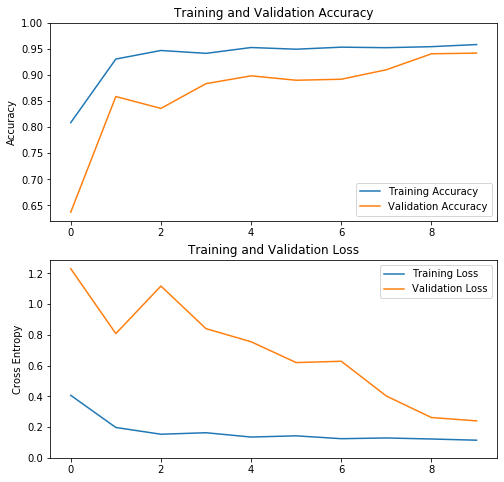

In [63]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Loss')
plt.show()